In [2]:
%load_ext autoreload
%autoreload 2
import warnings 
warnings.filterwarnings('ignore')

import lmp
import plotter
import analysis
import lmpsetup

# Summary

The main points of focus of this week are the same as last weeks, since the two last points were not achieved :

1. Obtain coexistence simulations for all other **CPEB4 variants** (except CPEB4 itself)


2. Improve the **reweighting/optimizing** and stablish some convergence.


3. Show the **contact maps** for the CPEB4 vs CPEB4_D4 


4. Show the **crossed** comparisons, that is 12D vs WT and 7D vs D4 and so


5. Show **Rg** distributions

### 1. CPEB4 Analogs comparison

Temperature range that will be used is [300.0 309.09 318.18 327.27 336.36 345.45 354.55 363.64 372.73 381.82 390.91 400.0]. Also, if time is available, maybe consider nontemper cases

In [18]:
# CPEB4_D4 x 50 

d4 = d4 = lmpsetup.LMPSetup(oliba_wd=f'/home/adria/perdiux/prod/lammps/dignon/CPEB4_D4x50_T350', protein='CPEB4_D4', temper=False, chains=50)
d4.temperature = 350
d4.write_hps_files()

In [19]:
# CPEB4_D4 x 50 

d4 = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CPEB4_D4x50', protein='CPEB4_D4', temper=True, chains=50)
d4.temperatures = [300.0, 309.09, 318.18, 327.27, 336.36, 345.45, 354.55, 363.64, 372.73, 381.82, 390.91, 400.0]
d4.write_hps_files(slurm=True)

In [20]:
# 7D_CPEB4 x 50 

sevD = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/7D_CPEB4x50_T350', protein='7D_CPEB4', temper=False, chains=50)
sevD.temperature = 350
sevD.write_hps_files(slurm=True)

In [21]:
# 7D_CPEB4 x 50 

sevD = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/7D_CPEB4x50', protein='7D_CPEB4', temper=True, chains=50)
sevD.temperatures = [300.0, 309.09, 318.18, 327.27, 336.36, 345.45, 354.55, 363.64, 372.73, 381.82, 390.91, 400.0]
sevD.write_hps_files(slurm=True)

In [22]:
# 12D_CPEB4_D4 x 50 

tweD = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/12D_CPEB4_D4x50', protein='12D_CPEB4_D4', temper=True, chains=50)
tweD.temperatures = [300.0, 309.09, 318.18, 327.27, 336.36, 345.45, 354.55, 363.64, 372.73, 381.82, 390.91, 400.0]
tweD.write_hps_files(slurm=True)

In [23]:
# 7D_CPEB4 x 50 

tweD = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/12D_CPEB4_D4x50_T350', protein='12D_CPEB4_D4', temper=False, chains=50)
tweD.temperature = 350
tweD.write_hps_files(slurm=True)

In [24]:
# CPEB4 x 50 

wt = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CPEB4x50-v3', protein='CPEB4', temper=True, chains=50)
wt.temperatures = [300.0, 309.09, 318.18, 327.27, 336.36, 345.45, 354.55, 363.64, 372.73, 381.82, 390.91, 400.0]
wt.write_hps_files(slurm=True)

In [25]:
# 7D_CPEB4 x 50 

wt = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/CPEB4x50-v3_T350', protein='CPEB4', temper=False, chains=50)
wt.temperature = 350
wt.write_hps_files(slurm=True)

Start by considering **12D**, which should not phase separate : 

### 2. Improve the **reweighting/optimizing** and stablish some convergence.

At the current time I only have 2 replicas for the cases where the cost depends only on the difference and the case where it depends on both the difference and the mean

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


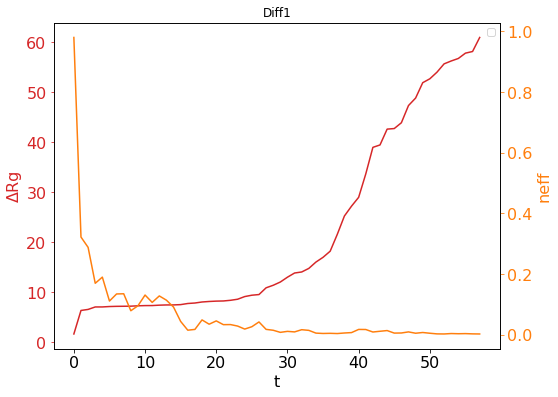

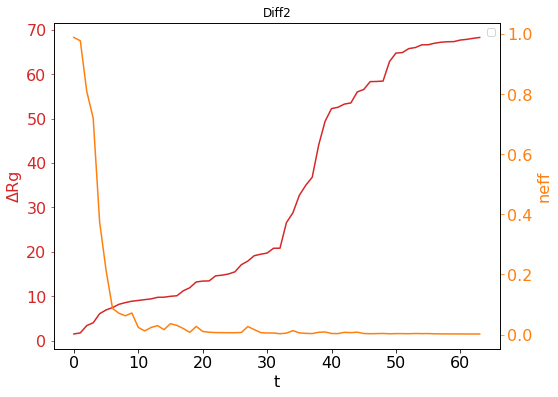

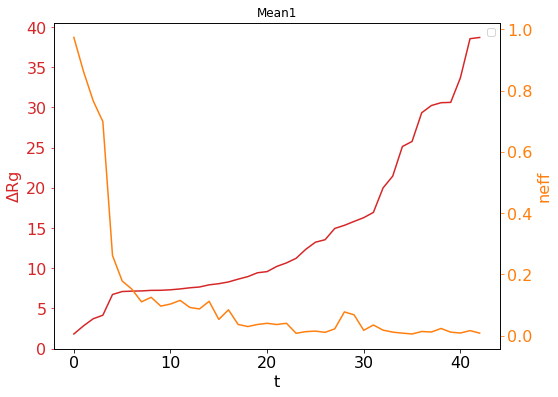

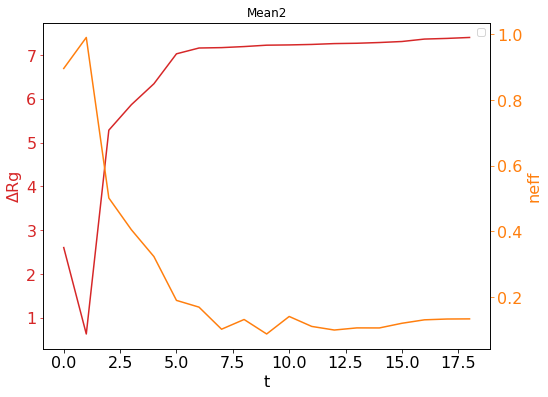

In [33]:
import numpy as np
import matplotlib.pyplot as plt

diff1 = np.genfromtxt('/home/adria/scripts/lammps/temp/min_diff_1.txt')
diff2 = np.genfromtxt('/home/adria/scripts/lammps/temp/min_diff_2.txt')
mean1 = np.genfromtxt('/home/adria/scripts/lammps/temp/min_diff_3.txt')
mean2 = np.genfromtxt('/home/adria/scripts/lammps/temp/min_diff_4.txt')
data = [diff1, diff2, mean1, mean2]
labs = ["Diff1", "Diff2", "Mean1", "Mean2"]
labels = {0:'t', 1:'cost', 2:'Rg A', 3:'Rg B', 4:'I (M)', 5:'ls', 6:'ε', 7:'N eff A', 8:'N eff B'}
for i, d in enumerate(data):
    figure, axis = plt.subplots(figsize=(8,6))
    axis2 = axis.twinx()

    axis.set_title(labs[i])
    axis.set_xlabel("t", fontsize=16)
    axis.set_ylabel("ΔRg", color='tab:red', fontsize=16)
    axis.tick_params(axis='y', colors='tab:red')
    axis2.set_ylabel("neff", color='tab:orange',fontsize=16)
    axis2.tick_params(axis='y', colors='tab:orange')
    
    axis.plot(np.abs(d[:,2]-d[:,3]), color='tab:red')
    axis2.plot(d[:,-1], color='tab:orange')
    
    axis.yaxis.set_tick_params(labelsize=16)
    axis.xaxis.set_tick_params(labelsize=16)
    axis2.yaxis.set_tick_params(labelsize=16)
    plt.legend()

### 3. Contact maps for CPEB4 vs CPEB4_D4

In [3]:
cmap_compare = plotter.Plotter()
cmap_compare.index

,Protein,I,Eps,Scale,Name,FullPath
0,12D_CPEB4_D4,100,80.0,1.0,1.0ls-100I-80e,/home/adria/data/prod/lammps/12D_CPEB4_D4/1.0l...
1,7D_CPEB4,100,80.0,1.0,1.0ls-100I-80e,/home/adria/data/prod/lammps/7D_CPEB4/x1/1.0ls...
2,CPEB4,100,80.0,1.0,1.0ls-100I-80e,/home/adria/data/prod/lammps/CPEB4/x1/1.0ls-10...
3,CPEB4_D4,100,80.0,1.0,1.0ls-100I-80e,/home/adria/data/prod/lammps/CPEB4_D4/1.0ls-10...
4,CPEB4x50-24,100,80.0,1.0,CPEB4x50-24,/home/adria/data/prod/lammps/CPEB4x50-24
5,CPEB4x50,100,10.0,1.0,1.0ls-100I-10e,/home/adria/data/prod/lammps/CPEB4x50/1.0ls-10...
6,CPEB4x50,100,80.0,1.0,1.0ls-100I-80e,/home/adria/data/prod/lammps/CPEB4x50/1.0ls-10...
7,TDP,100,80.0,1.0,TDP,/home/adria/data/prod/lammps/TDP


No handles with labels found to put in legend.


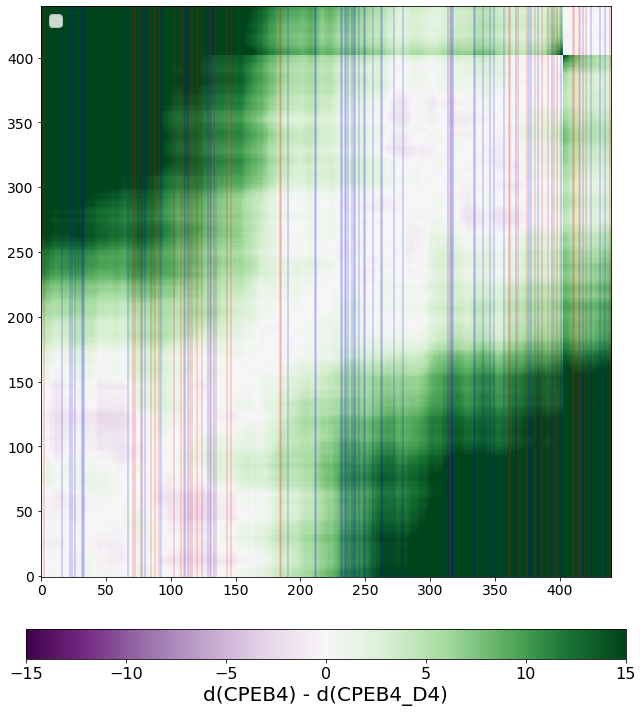

In [16]:
cmap_compare.clean()
contacts = cmap_compare.plot(observable='distance_map', index=2, index2=3, plot_id='d4v', cmap_label=("d(CPEB4) - d(CPEB4_D4)"), vmin=-15, vmax=15)

### 4. Crossed comparisons

### 5. Rg distribution

In [11]:
distr = plotter.Plotter()
distr.index

['/home/adria/data/prod/lammps/12D_CPEB4_D4/1.0ls-100I-80e', '/home/adria/data/prod/lammps/12D_CPEB4_D4x50/FIXT', '/home/adria/data/prod/lammps/12D_CPEB4_D4x50/REX', '/home/adria/data/prod/lammps/7D_CPEB4/1.0ls-100I-80e', '/home/adria/data/prod/lammps/7D_CPEB4x50/FIXT', '/home/adria/data/prod/lammps/7D_CPEB4x50/REX', '/home/adria/data/prod/lammps/CPEB4/1.0ls-100I-80e', '/home/adria/data/prod/lammps/CPEB4_D4/1.0ls-100I-80e', '/home/adria/data/prod/lammps/CPEB4_D4x50/FIXT', '/home/adria/data/prod/lammps/CPEB4_D4x50/REX', '/home/adria/data/prod/lammps/CPEB4x50-24', '/home/adria/data/prod/lammps/CPEB4x50/1.0ls-100I-10e', '/home/adria/data/prod/lammps/CPEB4x50/1.0ls-100I-80e', '/home/adria/data/prod/lammps/TDP', '/home/adria/data/prod/lammps/TDP-BIG']
15 15 15 15 15 15


,Protein,I,Eps,Scale,Name,FullPath
0,12D_CPEB4_D4,100,80.0,1.0,1.0ls-100I-80e,/home/adria/data/prod/lammps/12D_CPEB4_D4/1.0l...
1,12D_CPEB4_D4x50,100,80.0,1.0,FIXT,/home/adria/data/prod/lammps/12D_CPEB4_D4x50/FIXT
2,12D_CPEB4_D4x50,100,80.0,1.0,REX,/home/adria/data/prod/lammps/12D_CPEB4_D4x50/REX
3,7D_CPEB4,100,80.0,1.0,1.0ls-100I-80e,/home/adria/data/prod/lammps/7D_CPEB4/1.0ls-10...
4,7D_CPEB4x50,100,80.0,1.0,FIXT,/home/adria/data/prod/lammps/7D_CPEB4x50/FIXT
5,7D_CPEB4x50,100,80.0,1.0,REX,/home/adria/data/prod/lammps/7D_CPEB4x50/REX
6,CPEB4,100,80.0,1.0,1.0ls-100I-80e,/home/adria/data/prod/lammps/CPEB4/1.0ls-100I-80e
7,CPEB4_D4,100,80.0,1.0,1.0ls-100I-80e,/home/adria/data/prod/lammps/CPEB4_D4/1.0ls-10...
8,CPEB4_D4x50,100,80.0,1.0,FIXT,/home/adria/data/prod/lammps/CPEB4_D4x50/FIXT
9,CPEB4_D4x50,100,80.0,1.0,REX,/home/adria/data/prod/lammps/CPEB4_D4x50/REX


Run Completed at 88.22%. Ran 88220000 steps 
<mdtraj.Trajectory with 8265 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 8265 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 8265 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 8265 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 8265 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 8265 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 8265 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 8265 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 8265 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 8265 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 8265 frames, 440 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 8265 frames, 440 atoms, 1 residues, and unitcells>
Taking frames every 2 for a total of 1000 to avoid stro

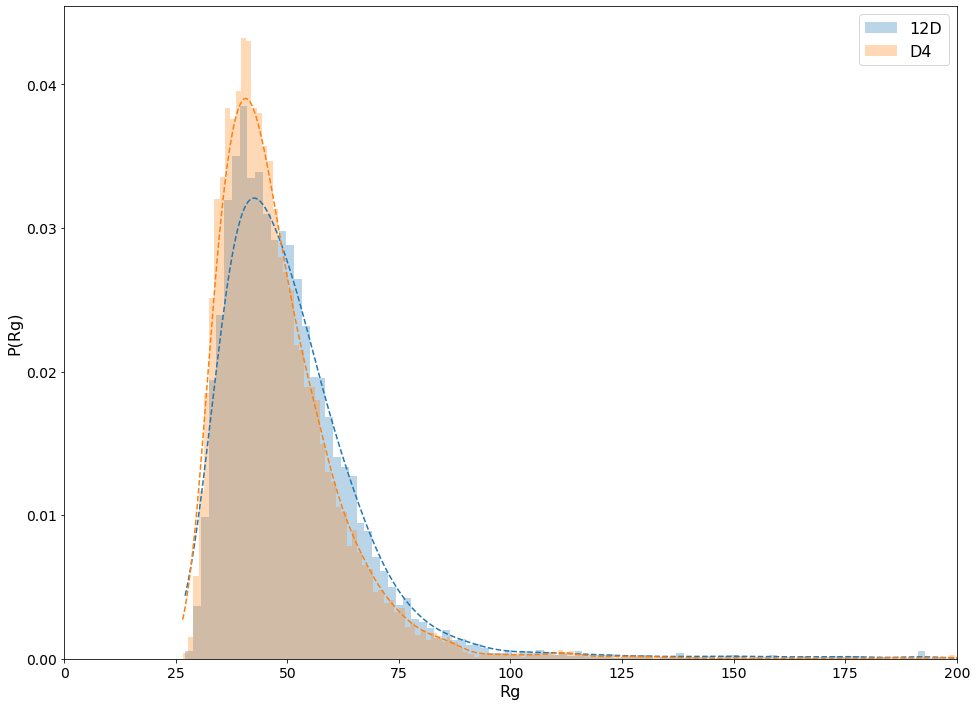

In [24]:
distr.clean()
r = distr.plot(observable='rg_distr', index=0, plot_id="S", label="12D", alpha=0.3);
r = distr.plot(observable='rg_distr', index=7, plot_id="S", label="D4", alpha=0.3);

Run Completed at 89.89%. Ran 89890000 steps 
<mdtraj.Trajectory with 17979 frames, 448 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 17979 frames, 448 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 17979 frames, 448 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 17979 frames, 448 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 17979 frames, 448 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 17979 frames, 448 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 17979 frames, 448 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 17979 frames, 448 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 17979 frames, 448 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 17979 frames, 448 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 17979 frames, 448 atoms, 1 residues, and unitcells>
<mdtraj.Trajectory with 17979 frames, 448 atoms, 1 residues, and unitcells>
Taking frames every 2 for a total of 1000 t

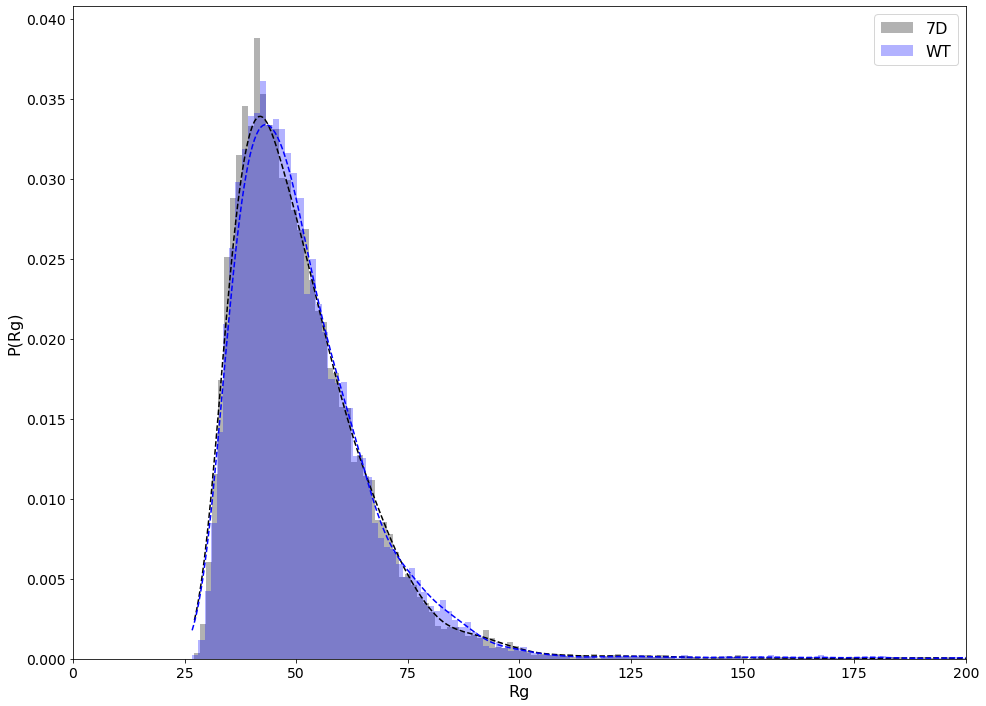

In [25]:
distr.clean()
r = distr.plot(observable='rg_distr', index=3, plot_id="S", label="7D", alpha=0.3, color='black');
r = distr.plot(observable='rg_distr', index=6, plot_id="S", label="WT", alpha=0.3, color='blue');